3.3.1. Introduction to KNN classification

In [1]:
'''
supervised learning:
    output predict on input
    inputs : Predictors, Independent Variables, Features, Variables
    outputs: Response variables, Dependent variables
    
Regression Problems : Quantitative response: number measures weight height 
Classification Problem  : Qualitative response: Y/N, Blue/Green

kNN : 
    1 approach to classification
    k = 5: 
        identify 5 data point near the data
        classify new data point as belonging to most common class among those neighbours

'''

'\nsupervised learning:\n    output predict on input\n    inputs : Predictors, Independent Variables, Features, Variables\n    outputs: Response variables, Dependent variables\n    \nRegression Problems : Quantitative response: number measures weight height \nClassification Problem  : Qualitative response: Y/N, Blue/Green\n\nkNN : \n    1 approach to classification\n    k = 5: \n        identify 5 data point near the data\n        classify new data point as belonging to most common class among those neighbours\n\n'

3.3.2 Finding the distance between two points

In [2]:
'''
(x1,y1) (x2,y2) 
d2 = ((x2-x1)^2 + (y2-y1)^2)0.5
mathematics : numpy
'''

'\n(x1,y1) (x2,y2) \nd2 = ((x2-x1)^2 + (y2-y1)^2)0.5\nmathematics : numpy\n'

In [3]:
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])
p2-p1

array([3, 3])

In [4]:
np.power(p2-p1, 2)

array([9, 9], dtype=int32)

In [5]:
np.sqrt(np.sum(np.power(p2-p1, 2)))

4.242640687119285

In [6]:
import numpy as np

def distance(p1,p2):
    '''
    Find the distance between the points p1, p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [7]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.242640687119285

3.3.3 Majority Vote

In [8]:
'''
KNN - Majority vote
Sequence of votes 
    - 1,2,3 : determine how many times each occured and find most common elements
    ex: 2 - 1's
        1 - 2's
        1 - 3's
        majority vote - 2
        
'''

"\nKNN - Majority vote\nSequence of votes \n    - 1,2,3 : determine how many times each occured and find most common elements\n    ex: 2 - 1's\n        1 - 2's\n        1 - 3's\n        majority vote - 2\n        \n"

In [9]:
def count_words(text):
    '''
    Count the number of times each word occures in text (str). skip punctuation
    Returns dictionary where keys are unique words and values are word counts.
    
    '''
    text=text.lower()
    
    skips = [".", ",", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch,"")
    
    word_counts = {}
    
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        
        else:
            word_counts[word] = 1
            
    return word_counts

In [10]:
def majority_vote(votes):
    '''
    Return the most common element in votes
    
    '''
    vote_counts = {}
    
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1  
        else:
            vote_counts[vote] = 1
    
    return vote_counts

In [11]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

vote_counts = majority_vote(votes)
vote_counts

{1: 3, 2: 3, 3: 6}

In [12]:
max(vote_counts)

3

In [13]:
max(vote_counts.keys())

3

In [14]:
max(vote_counts.values())

6

In [15]:
max_counts = max(vote_counts.values())
max_counts

6

In [16]:
for vote, count in vote_counts.items():
    print(vote,count)

1 3
2 3
3 6


In [17]:
winners = []
max_counts = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_counts:
        winners.append(vote)
    
winners    

[3]

In [18]:
import random

def majority_vote(votes):
    '''
    Return the most common element in votes    
    '''
    vote_counts = {}
    
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1  
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_counts = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
    
    return random.choice(winners)

In [19]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

winner = majority_vote(votes)
winner

3

In [20]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

In [21]:
winner = majority_vote(votes)
winner

3

In [22]:
winner = majority_vote(votes)
winner

2

In [23]:
'''
most commonly occured element in the sequence - mode
'''

import scipy.stats as ss

def majority_vote_short(votes):
    '''
    Return the most common element in votes
    '''
    mode, count = ss.mstats.mode(votes)
    return mode

In [24]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

majority_vote_short(votes)

array([3.])

In [25]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

majority_vote_short(votes)

array([2.])

3.3.4 Finding Nearest Neighbors

In [26]:
'''
loop over all points
    compute the distance between point p and every other point
sort distances and return those k points that are nearest to point p
'''

'\nloop over all points\n    compute the distance between point p and every other point\nsort distances and return those k points that are nearest to point p\n'

In [27]:
'''
set simple data set
'''

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [28]:
p = np.array([2.5,2])

In [29]:
points.shape

(9, 2)

In [30]:
p.shape

(2,)

In [31]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1],"ro")

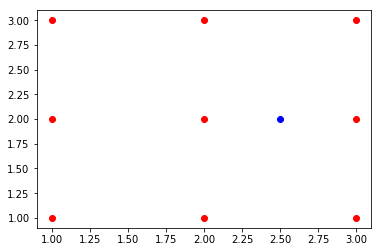

In [32]:
plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0], p[1],"bo")

[0.5, 3.5, 0.5, 3.5]

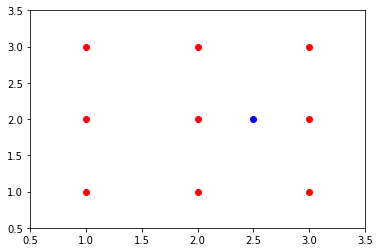

In [33]:
plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0], p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [34]:
distances = np.zeros(points.shape[0]) #empty array to hold all distances between points
for i in range(len(distances)):
    distances[i]= distance(p, points[i])  #calculate distance between point p and each of the points in array

In [35]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [36]:
points[4]

array([2, 2])

In [37]:
distances[4]

0.5

In [38]:
points[7]

array([3, 2])

In [39]:
distances[7]

0.5

In [40]:
#sort array
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [41]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [42]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [43]:
distances[ind[0:2]]

array([0.5, 0.5])

In [44]:
def find_nearest_neighbors(p, points, k=5):
    '''
    find k nearest neighbors of point p and return their indices. 
    '''
    distances = np.zeros(points.shape[0]) #empty array to hold all distances between points
    for i in range(len(distances)):
        distances[i]= distance(p, points[i])  #calculate distance between point p and each of the points in array
    ind = np.argsort(distances)
    return ind[:k] #similar [0:k]

In [45]:
ind = find_nearest_neighbors(p,points,2)
print(points[ind])

[[2 2]
 [3 2]]


In [46]:
ind = find_nearest_neighbors(p,points,3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [47]:
def knn_predict(p, point, outcomes, k=5):
    '''
        
    '''
    ind = find_nearest_neighbors(p,point,k)#find k nearest neighbors
    return majority_vote(outcomes[ind])#predict class of p based on majority vote

In [48]:
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # 2 classes: class 0 and class 1
len(outcomes)

9

In [49]:
knn_predict(np.array([2.5,2.7]),points,outcomes,k=2)

1

In [50]:
knn_predict(np.array([1.0,2.7]),points,outcomes,k=2)

0

3.3.5 Generating Synthetic Data

In [51]:
'''
synthetic data:
    scipystat module
    generates data with the help of computer - 
    bivariate: (like x,y) 1st end point: class 0, second end point: class 1
    univariate data: just x variable generated
    
    np.concatenate : takes tuple of np.arrays an joins them lengthwise along the specified axis
    
    benefits : know exactly how the data were generated so you know what to expect when testing code
    
'''

'\nsynthetic data:\n    scipystat module\n    generates data with the help of computer - \n    bivariate: (like x,y) 1st end point: class 0, second end point: class 1\n    univariate data: just x variable generated\n    \n'

In [52]:
ss.norm(0,1) # mean and std dev from class 1

In [53]:
 ss.norm(0,1).rvs((5,2)) #5 rows, 2 columns

array([[ 0.23689521, -0.66573134],
       [ 0.84064732, -0.58704601],
       [ 1.39093015, -0.55456665],
       [-0.69293597, -1.87994874],
       [-2.09529535,  0.738499  ]])

In [54]:
ss.norm(1,1).rvs((5,2)) #mean 1 std dev 1

array([[0.56946858, 0.77013688],
       [0.39645467, 1.55902908],
       [1.32021522, 0.99345154],
       [0.66775582, 0.61992192],
       [0.43863017, 1.61873729]])

In [57]:
np.concatenate( (ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))),axis=0) #concate along rows

array([[-0.20188434, -0.87202474],
       [ 0.18813547,  0.81298128],
       [-0.31788122,  0.9397988 ],
       [-1.42501963, -0.36450803],
       [-0.67402371, -1.77708272],
       [ 0.68494376,  1.33524302],
       [ 2.12961931,  1.63226492],
       [-0.05634601,  1.63849109],
       [ 3.13854666,  0.5893385 ],
       [ 2.18675873,  2.39811298]])

In [59]:
np.repeat(0,5)

array([0, 0, 0, 0, 0])

In [60]:
np.repeat(1,5)

array([1, 1, 1, 1, 1])

In [62]:
np.concatenate((np.repeat(0,5),np.repeat(1,5)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [63]:
def generate_synth_data(n=50):
    '''
    create two sets of point from bivariate norm distribution
    '''
    points = np.concatenate( (ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))),axis=0) 
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return(points,outcomes)

In [67]:
n = 20
(points,outcomes) = generate_synth_data(n)
print("points: {}",points)
print("poutcomes: {}",outcomes)

points: {} [[-1.4954762   0.74329923]
 [-0.16337174 -1.08605693]
 [-0.68446004  0.76117483]
 [ 1.14575427  0.4857375 ]
 [-0.14996836  0.22239503]
 [-0.74685742 -0.61199736]
 [-1.8970199  -1.09073458]
 [-0.68907915  1.02613579]
 [-1.67221744 -0.39794507]
 [-0.50246674 -1.2552244 ]
 [ 0.38943073 -1.06716397]
 [ 0.32149739 -0.03741633]
 [ 0.71121292  1.07728053]
 [-0.64873948  0.39326577]
 [ 0.1953126  -0.23138478]
 [ 0.02695373  1.09731753]
 [ 0.48000045  0.73298456]
 [-0.88808003 -0.97262276]
 [ 0.67867943  0.47044509]
 [-1.44972326 -2.91454206]
 [ 1.01002136  3.28626903]
 [ 1.36199122  1.26437814]
 [ 0.85702507  0.58328461]
 [ 1.89486389  1.79810059]
 [ 1.93198129  0.03959766]
 [ 1.48016012  1.51076445]
 [ 1.73016473  0.34404956]
 [-0.62789874  2.51834015]
 [ 2.44032361  0.16253847]
 [ 0.17602274 -0.71788472]
 [ 2.14121307  1.23566955]
 [-0.03653584  1.97034626]
 [-0.1427546   2.62589256]
 [ 1.67655483  0.96066373]
 [ 1.4863996   0.24983341]
 [ 0.29129097  1.7178968 ]
 [ 0.67833766  1.

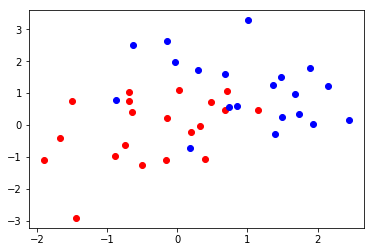

In [69]:
import matplotlib.pyplot as plt

n =20

plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro") #class 0
plt.plot(points[n:,0],points[n:,1],"bo") #class 1
plt.savefig("bivardata.pdf")

3.3.6 Making a prediction Grid

In [71]:
'''
    Prediction grid:
        examine some part of prediction grid and compute grid using KNN
'''

'\n    Prediction grid:\n        examine some part of prediction grid and compute grid using KNN\n'

In [85]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    '''
    Classify each point on the prediction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    
    xs = np.arange(x_min, x_max, h) #Values are generated within the half-open interval (start, stop, steps)
    ys = np.arange(y_min, y_max, h) #creates regularly spaced values between start and stop, spacing given in steps
    
    xx,yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int) #int: 0,1
        
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            #j,i : column, row
    
    return(xx,yy, prediction_grid)

In [73]:
'''
Meshgrid : 
    2 vecotrs : 
        1 : x value for each grid point
        1 : y value for each grid point
        
enumerate:
    sequence: access to different sequence and index both
    Takes an iterable with tuple, returns new iterable with tuple as 
        an first index of each tuple is the index of the tuple in the iterable.
'''
seasons = ["Spring", "Summer", "Fall", "Winter"]

list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [76]:
for ind,season in enumerate(seasons):
    print(ind, season)

0 Spring
1 Summer
2 Fall
3 Winter


3.3.7 Ploting the prediction Grid

In [77]:
(predictors, outcomes) = generate_synth_data()

In [78]:
predictors.shape

(100, 2)

In [79]:
outcomes.shape

(100,)

In [87]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ 
    Plot KNN predictions for every point on the grid.
    """
    from matplotlib.colors import ListedColormap
    
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

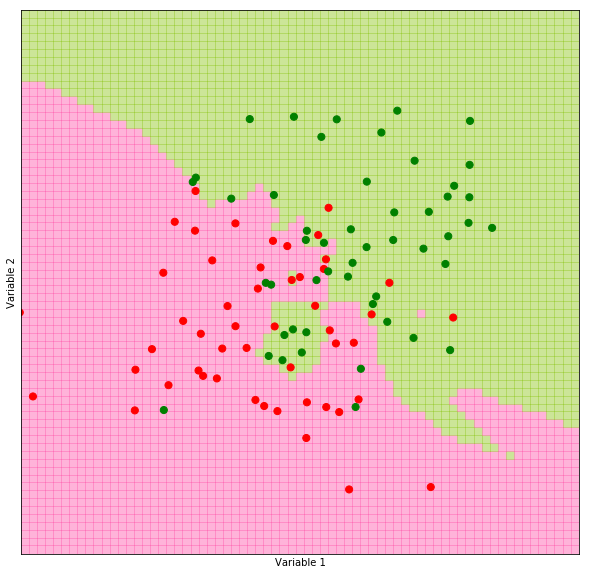

In [88]:
k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

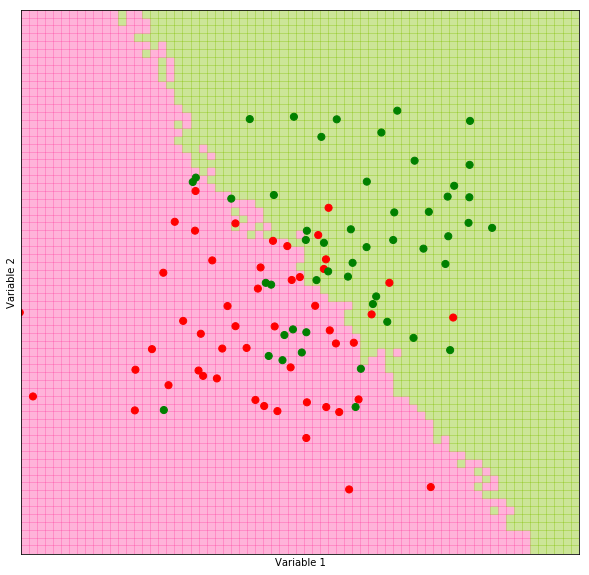

In [89]:
k=50; filename="knn_synth_50.pdf"; limits=(-3,4,-3,4); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [90]:
'''
Bias variance tradeoff :
    k = too smaller/ too large is not optimal for on future dataset hich we havent seen
    intermediatte value may be best
'''

'\nBias variance tradeoff :\n    k = too smaller/ too large is not optimal for on future dataset hich we havent seen\n    intermediatte value may be best\n'

3.3.8 Applying KNN

In [119]:
'''
SciKitLearn:
    machine learning lib
    
    dataset : iris flowers - Sepal length, petal length, petal width
'''

'\nSciKitLearn:\n    machine learning lib\n    \n    dataset : iris flowers - Sepal length, petal length, petal width\n'

In [93]:
from sklearn import datasets
iris = datasets.load_iris()

In [94]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [95]:
predictors = iris.data[:,0:2] #all rows, 1st 2 columns
outcomes = iris.target

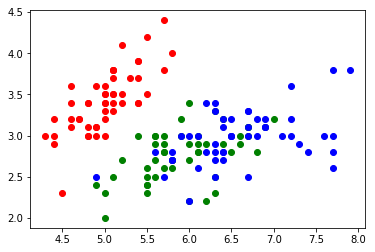

In [99]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro") #column 0
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go") #column 1
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo") #column 2
plt.savefig("iris.pdf")

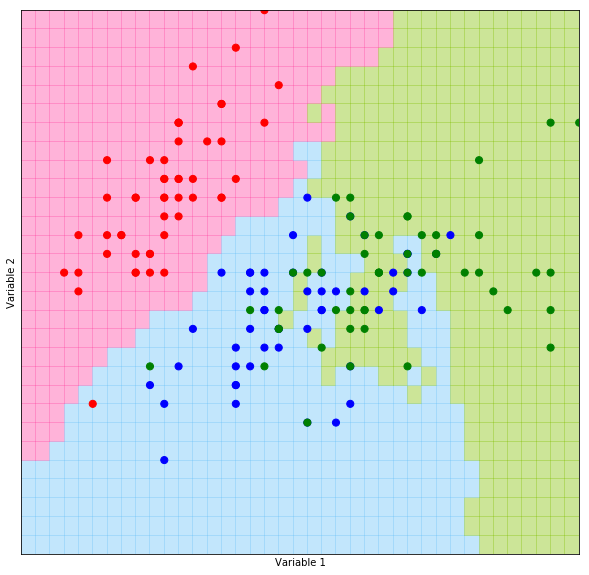

In [100]:
k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [105]:
knn.fit(predictors, outcomes)

KNeighborsClassifier()

In [106]:
sk_predictions = knn.predict(predictors)

In [107]:
sk_predictions.shape

(150,)

In [109]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [112]:
my_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [114]:
np.mean(sk_predictions==my_predictions)

0.96

In [116]:
np.mean(sk_predictions==outcomes)

0.8333333333333334

In [118]:
np.mean(my_predictions==outcomes)

0.8466666666666667